# Get data - Ripped from Eric's Code

## Install and import

In [1]:
!pip install -q easysnowdata # Eric's snow package

In [2]:
import pandas as pd
import geopandas as gpd
import rasterio as rio
import matplotlib.pyplot as plt
import easysnowdata
import folium
import earthaccess

## Define area of interest bounding box

In [3]:
bbox_gdf = gpd.read_file('~/snowmelt-timing-2024/contributors/eric/grand_mesa.geojson')

In [4]:
bbox_gdf.explore()

## UCLA SWE reanalysis - download the data

In [5]:
import earthaccess
earthaccess.login()

Enter your Earthdata Login username:  MollyTedesche
Enter your Earthdata password:  ········


In [6]:
snow_reanalysis_da = easysnowdata.hydroclimatology.get_ucla_snow_reanalysis(
    bbox_gdf,
    start_date="2020-03-01",
    end_date="2020-04-30",
    variable="SWE_Post",
    stats="mean",
)

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

In [11]:
print(snow_reanalysis_da)

<xarray.DataArray 'SWE_Post' (time: 61, Longitude: 167, Latitude: 93)> Size: 4MB
dask.array<getitem, shape=(61, 167, 93), dtype=float32, chunksize=(1, 84, 48), chunktype=numpy.ndarray>
Coordinates:
  * Latitude     (Latitude) float32 372B 39.21 39.21 39.2 ... 38.81 38.81 38.8
  * Longitude    (Longitude) float32 668B -108.4 -108.4 -108.4 ... -107.6 -107.6
  * time         (time) datetime64[ns] 488B 2020-03-01 2020-03-02 ... 2020-04-30
    spatial_ref  int64 8B 0
Attributes:
    Units:    meters


## Plot the reanalysis SWE data timeseries - per day

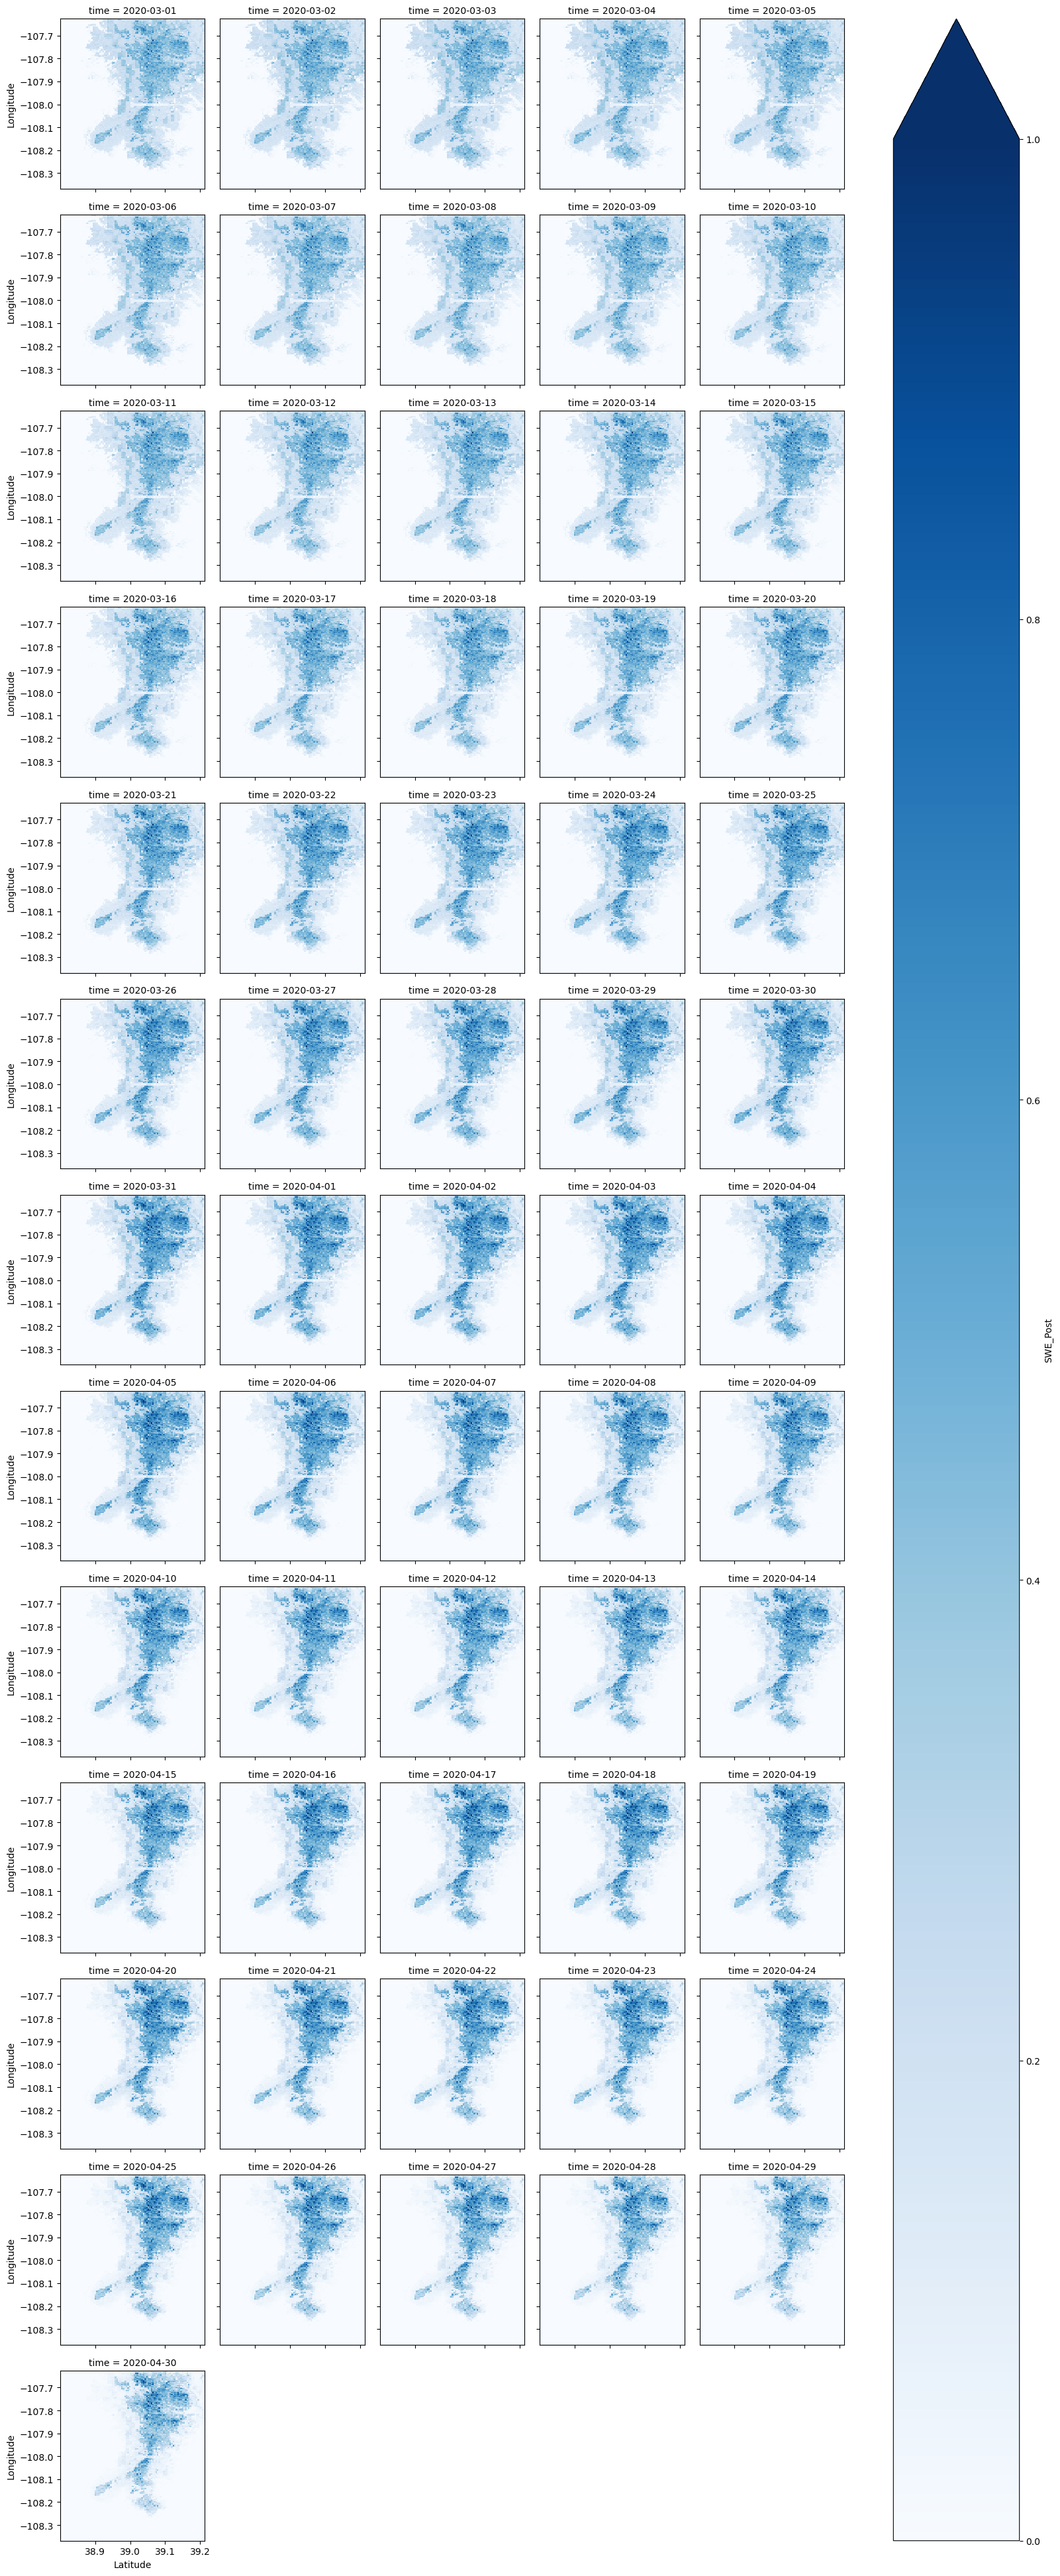

In [10]:
snow_reanalysis_da.plot.imshow(
    col="time",
    col_wrap=5,
    cmap="Blues",
    vmin=0,
    vmax=1
    #x="Longitude",     # Explicitly set the x-axis to Longitude
    #y="Latitude"       # Explicitly set the y-axis to Latitude
)

## Snow Reanalysis Max SWE Values & Dates - Molly's code

In [31]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# 3D array representing SWE time series for March and April 2020
# Calculate the maximum SWE per pixel across the time
#maxSWE_per_pixel = np.max(snow_reanalysis_da, axis=0)

# Output the shape of the result to confirm it's a 2D array
#print(maxSWE_per_pixel.shape)  # Output should be (100, 100)

# inspect the max values
#print(maxSWE_per_pixel)


# Extract the maximum SWE values at each pixel location across time
maxSWE_values = snow_reanalysis_da.max(dim='time')#.plot.imshow()

# Extract the corresponding date for each maximum SWE value
maxSWE_dates = snow_reanalysis_da.idxmax(dim='time').dt.dayofyear#.plot.imshow()

print(maxSWE_values)
print(maxSWE_dates)

<xarray.DataArray 'SWE_Post' (Longitude: 167, Latitude: 93)> Size: 62kB
dask.array<_nanmax_skip-aggregate, shape=(167, 93), dtype=float32, chunksize=(84, 48), chunktype=numpy.ndarray>
Coordinates:
  * Latitude     (Latitude) float32 372B 39.21 39.21 39.2 ... 38.81 38.81 38.8
  * Longitude    (Longitude) float32 668B -108.4 -108.4 -108.4 ... -107.6 -107.6
    spatial_ref  int64 8B 0
<xarray.DataArray 'dayofyear' (Longitude: 167, Latitude: 93)> Size: 124kB
dask.array<_access_through_series, shape=(167, 93), dtype=int64, chunksize=(42, 48), chunktype=numpy.ndarray>
Coordinates:
  * Latitude     (Latitude) float32 372B 39.21 39.21 39.2 ... 38.81 38.81 38.8
  * Longitude    (Longitude) float32 668B -108.4 -108.4 -108.4 ... -107.6 -107.6
    spatial_ref  int64 8B 0


## Plot Max SWE Values

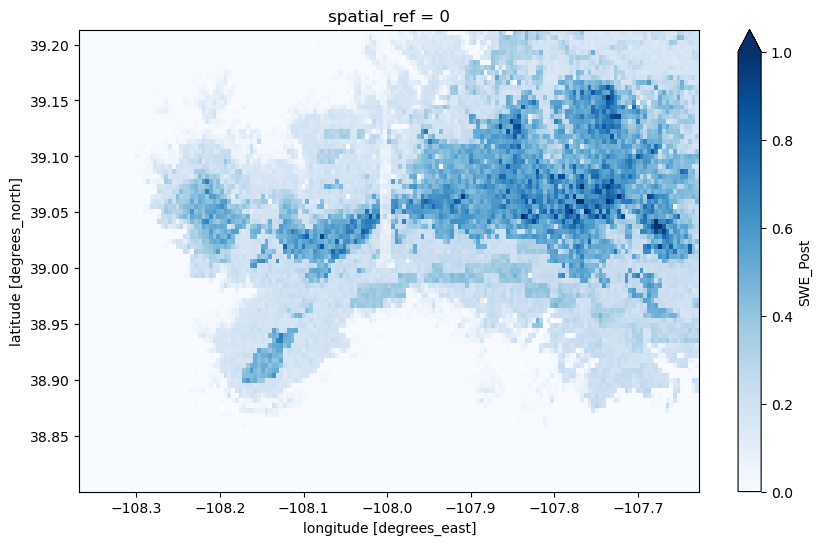

In [32]:
lat_extent = maxSWE_values.Latitude.max() - maxSWE_values.Latitude.min()
lon_extent = maxSWE_values.Longitude.max() - maxSWE_values.Longitude.min()

aspect_ratio = abs(lat_extent / lon_extent)

maxSWE_values.plot.imshow(
     # col="time",    # Commented out, as not needed for a single plot
    col_wrap=5,      # Wrap subplots if necessary
    cmap="Blues",    # Set the color map to "Blues"
    vmin=0,          # Minimum value for the color scale
    vmax=1,          # Maximum value for the color scale
    x="Longitude",   # Set the x-axis to Longitude
    y="Latitude",    # Set the y-axis to Latitude
    aspect=aspect_ratio,  # Set the aspect ratio manually
    figsize=(10, 6)  # Adjust the figure size as needed
)

## Plot Max SWE Dates

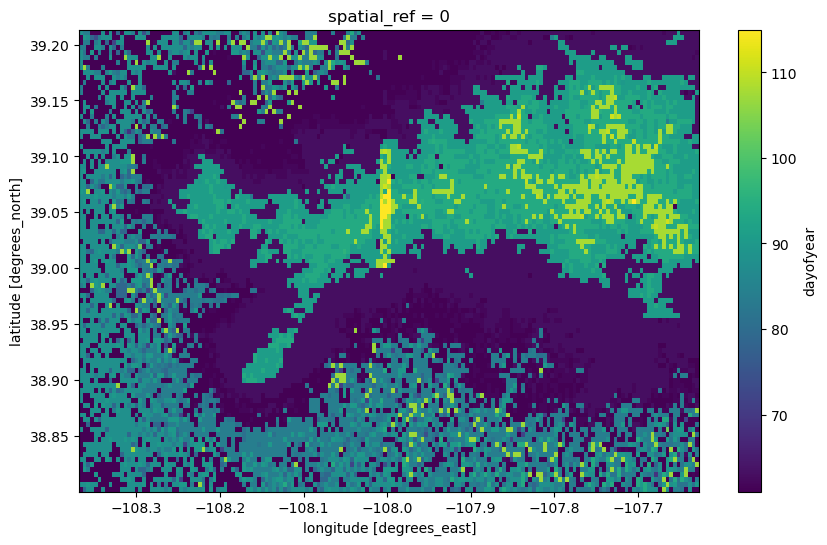

In [36]:
lat_extent2 = maxSWE_dates.Latitude.max() - maxSWE_dates.Latitude.min()
lon_extent2 = maxSWE_dates.Longitude.max() - maxSWE_dates.Longitude.min()

aspect_ratio2 = abs(lat_extent2 / lon_extent2)

snow_reanalysis_da.idxmax(dim='time').dt.dayofyear.plot.imshow(
#maxSWE_dates.plot.imshow(
    # col="time",    # Commented out, as not needed for a single plot
    #col_wrap=5,      # Wrap subplots if necessary
    #cmap="Greens",    # Set the color map to "Greens"
    #vmin=0,          # Minimum value for the color scale
    #vmax=1,          # Maximum value for the color scale
    x="Longitude",   # Set the x-axis to Longitude
    y="Latitude",    # Set the y-axis to Latitude
    aspect=aspect_ratio2,  # Set the aspect ratio manually
    figsize=(10, 6)  # Adjust the figure size as needed
)